In [2]:
from pathlib import Path
import pandas as pd

# Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes:
    - 'Normal': 0, 
    - 'Supraventricular ectopic beat': 1, 
    - 'Ventricular ectopic beat': 2, 
    - 'Fusion beat': 3, 
    - 'Unknown beat': 4
- All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

How is the train/test split?

In [3]:
datadir = Path('../hackathon-data/')
trainfile = datadir / 'heart_big_train.parq'
validfile = datadir / 'heart_big_valid.parq'
train_df = pd.read_parquet(trainfile)
valid_df = pd.read_parquet(validfile)
len(train_df), len(valid_df)

(87554, 10946)

And what about the balance of the target?

In [4]:
train_df.target.value_counts(), valid_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
valid_percentages = valid_df.target.value_counts(normalize=True) * 100
train_percentages,  valid_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

In [5]:
test = 100.0 / train_percentages
test.to_numpy()


array([  1.20812463,  13.61436791,  15.1268141 ,  39.38551507,
       136.58970359])

In [6]:
grouped = train_df.groupby('target')
grouped = grouped.sample(n=grouped.size().max(), replace=True)
grouped.iloc[:, :144]

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
62436,0.071023,0.198864,0.335227,0.463068,0.528409,0.653409,0.758523,0.792614,0.786932,0.792614,...,0.801136,0.818182,0.818182,0.843750,0.840909,0.857955,0.000000,0.000000,0.000000,0.000000
23662,1.000000,0.563410,0.193347,0.185031,0.095634,0.000000,0.037422,0.149688,0.241164,0.276507,...,0.297297,0.311850,0.320166,0.316008,0.316008,0.322245,0.332640,0.328482,0.328482,0.334719
62445,0.967742,0.884793,0.442396,0.000000,0.172811,0.203917,0.147465,0.140553,0.137097,0.137097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13048,0.979417,0.907376,0.329331,0.000000,0.185249,0.291595,0.288165,0.301887,0.307033,0.313894,...,0.377358,0.358491,0.349914,0.356775,0.344768,0.317324,0.308748,0.315609,0.308748,0.298456
144,0.923567,0.439490,0.019108,0.063694,0.076433,0.063694,0.079618,0.063694,0.070064,0.073248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84236,1.000000,0.532110,0.605505,0.655963,0.720183,0.706422,0.784404,0.802752,0.756881,0.614679,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86386,1.000000,0.516729,0.535316,0.531599,0.568773,0.513011,0.524164,0.464684,0.297398,0.167286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
81906,1.000000,0.466926,0.466926,0.486381,0.486381,0.482490,0.474708,0.447471,0.342412,0.237354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87015,0.724638,0.624799,0.528180,0.402576,0.281804,0.151369,0.075684,0.011272,0.000000,0.011272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


What does the signal look like?

In [7]:
t0 = train_df[train_df['target'] == 0.0]
t2 = train_df[train_df['target'] == 2.0]
t4 = train_df[train_df['target'] == 4.0]
t1 = train_df[train_df['target'] == 1.0]
t3 = train_df[train_df['target'] == 3.0]

t1s = t1.sample(n=t4.shape[0], replace=True)
t3s = t3.sample(n=t4.shape[0], replace=True)

comb = pd.concat([t0,t1s,t2,t3s,t4])
comb.shape[0]


97552

In [11]:
import torch

train_percentages = comb.target.value_counts(normalize=True).sort_index() * 100

weights = torch.tensor((100 / train_percentages).to_numpy()).float()

weights

tensor([ 1.3461, 15.1690, 16.8542, 15.1690, 15.1690])

              0         1         2         3         4         5         6  \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87548  1.000000  0.405594  0.440559  0.405594  0.405594  0.384615  0.374126   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   

              7         8         9  ...  178  179 

([<matplotlib.axis.XTick at 0x7f2b09540d90>,
  ...],
 [Text(0, 0, '0'),
  Text(25, 0, '25'),
  Text(50, 0, '50'),
  Text(75, 0, '75'),
  Text(100, 0, '100'),
  Text(125, 0, '125'),
  Text(150, 0, '150'),
  Text(175, 0, '175'),
  Text(200, 0, '200'),
  Text(225, 0, '225'),
  Text(250, 0, '250'),
  Text(275, 0, '275'),
  Text(300, 0, '300'),
  Text(325, 0, '325'),
  Text(350, 0, '350'),
  Text(375, 0, '375'),
  Text(400, 0, '400'),
  Text(425, 0, '425'),
  Text(450, 0, '450'),
  Text(475, 0, '475'),
  Text(500, 0, '500'),
  Text(525, 0, '525'),
  Text(550, 0, '550'),
  Text(575, 0, '575'),
  Text(600, 0, '600'),
  Text(625, 0, '625'),
  Text(650, 0, '650'),
  Text(675, 0, '675'),
  Text(700, 0, '700'),
  Text(725, 0, '725'),
  Text(750, 0, '750'),
  Text(775, 0, '775'),
  Text(800, 0, '800'),
  Text(825, 0, '825'),
  Text(850, 0, '850'),
  Text(875, 0, '875'),
  Text(900, 0, '900'),
  Text(925, 0, '925'),
  Text(950, 0, '950'),
  Text(975, 0, '975'),
  Text(1000, 0, '1000'),
  Text(1025,

/home/svelthuis/group_c/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/svelthuis/group_c/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


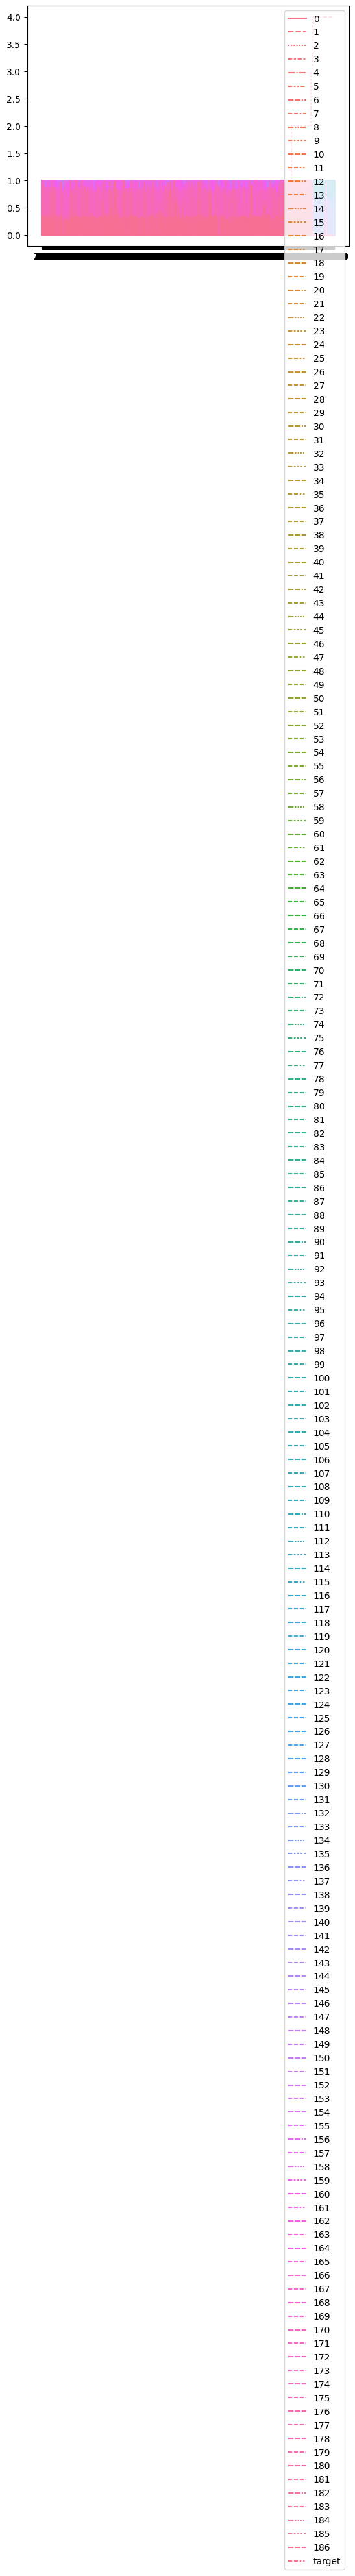

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[ :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25))

In [10]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186',
       'target'],
      dtype='object', length=188)